In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pymc3 as pm
import math as m
import arviz as az
import matplotlib.pyplot as plt

In [3]:
import dive

In [4]:
Filename = '../../data/3992_good.dat'
t, Vdata = dive.loadTrace(Filename)

In [5]:
nGauss = 1 # number of Gaussians 
model = dive.multigaussmodel(nGauss,t,Vdata)
model

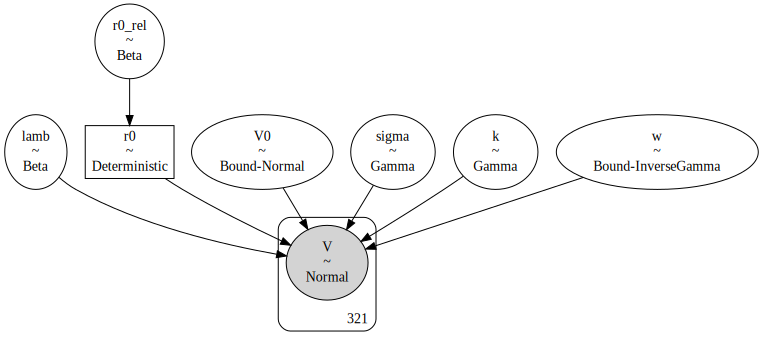

In [6]:
pm.model_to_graphviz(model)

In [7]:
MCMCparameters = {'draws':5000, 'chains':2, 'tune':1000, 'cores': 2}
df = dive.sample(model,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 59 seconds.


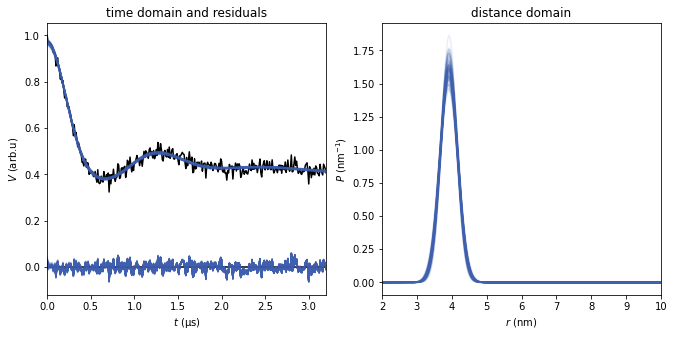

In [8]:
r = np.linspace(2, 10,num = 300)
Ps, Vs, _, _ = dive.drawPosteriorSamples(df,r,t)
dive.plotMCMC(Ps,Vs,Vdata,t,r)

In [9]:
df['r0']

array([[3.93171471],
       [3.90931343],
       [3.92258308],
       ...,
       [3.90178041],
       [3.90892048],
       [3.88972302]])

In [10]:
nGauss = 2 # number of Gaussians 
model2 = dive.multigaussmodel(nGauss,t,Vdata)
model2

In [11]:
MCMCparameters = {'draws':1000, 'chains':2, 'tune':100, 'cores': 2}
df2 = dive.sample(model2,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, V0, lamb, k, a, w, r0_rel]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 214 seconds.
The acceptance probability does not match the target. It is 0.8944413670279703, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.921434484345869, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [12]:
df2['r0'].shape[1]
df2.varnames

['r0_rel_logodds__',
 'w_interval__',
 'a_stickbreaking__',
 'k_log__',
 'lamb_logodds__',
 'V0_lowerbound__',
 'sigma_log__',
 'r0',
 'w',
 'a',
 'k',
 'lamb',
 'V0',
 'sigma']

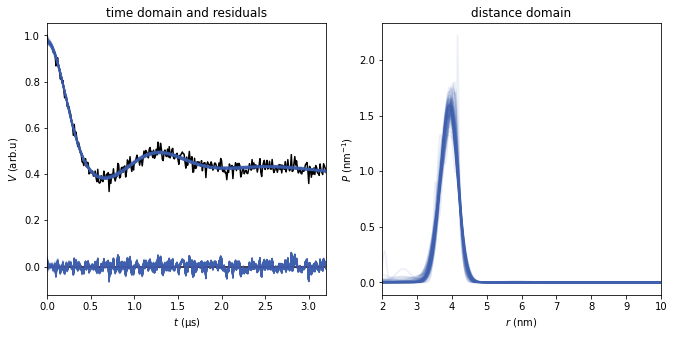

In [13]:
r = np.linspace(2, 10,num = 300)
Ps, Vs, _, _ = dive.drawPosteriorSamples(df2,r,t)
dive.plotMCMC(Ps,Vs,Vdata,t,r)